# Expt - 4: Outliers


To perform the following methods in order to remove outliers
- Standard Deviation Method
- Interquartile Range Method
- Automatic outlier Detection




## 1. Standard Deviation Method

A z-score measures the distance between a data point and the mean using standard deviations.

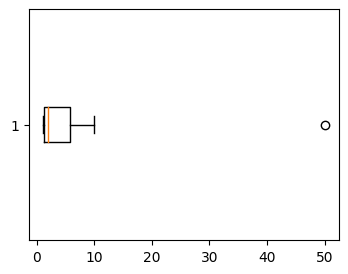

Mean =  5.944444444444445 
Std =  11.007432954459162
Outliers:
 [50]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
data = [1, 2, 5, 6, 3, 1, 1, 7, 2, 2, 2, 3, 1, 1, 2, 8, 10, 50]

# construct boxplot to see if there are outliers:
plt.figure(figsize = (4,3))
plt.boxplot(data, vert = False)
plt.show()

# get the mean and standard deviation of the data:
mean = np.mean(data)
std = np.std(data)
print("Mean = ", mean, "\nStd = ", std)

# define threshold of z score and get the outliers
threshold = 3
outliers = []
for i in data:
    z = (i - mean)/ std
    if z > threshold:
        outliers.append(i)

print("Outliers:\n", outliers)



### KDE plot

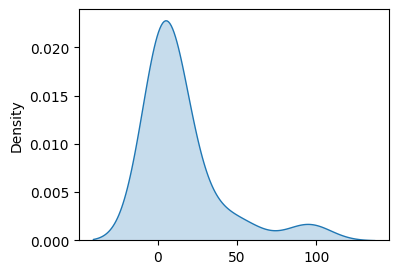

In [22]:
import seaborn as sns
plt.figure(figsize = (4,3))
sns.kdeplot(a, fill = True)
plt.show()

## 2. Interquartile Range Method

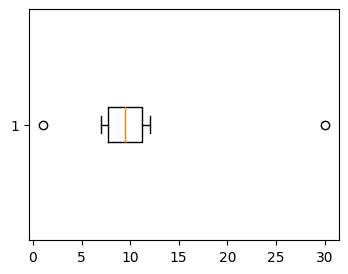

Quartile values using numpy:
Q1 =  7.75 
Q3 =  11.25
Quartile values using pandas:
Q1_pd =  7.75 
Q3_pd =  11.25

Boundaries:
lower =  2.5 
upper =  16.5

Outliers:  [ 1 30]


In [29]:
# define data
data = np.array([1, 7, 8, 9, 10, 11, 12, 30])

# boxplot
plt.figure(figsize = (4,3))
plt.boxplot(data, vert = False)
plt.show()

# get quartile values using numpy
Q1, Q3 = np.percentile(data, (25, 75))
print("Quartile values using numpy:")
print("Q1 = ", Q1, "\nQ3 = ", Q3)

# get quartile values using pandas
import pandas as pd
data_df = pd.DataFrame(data)
Q1_pd = data_df.quantile(0.25)
Q3_pd = data_df.quantile(0.75)
print("Quartile values using pandas:")
print("Q1_pd = ", Q1_pd[0], "\nQ3_pd = ", Q3_pd[0])

# calculate IQR and boundry values:
IQR = Q3 - Q1
lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)
print("\nBoundaries:")
print("lower = ", lower_bound, "\nupper = ", upper_bound)

# create conditions to isolate the outliers
outliers = data[(data < lower_bound)| (data> upper_bound)]
print("\nOutliers: ", outliers)


## Automatic outlier Detection – Isolation Forest

### Salary Data

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


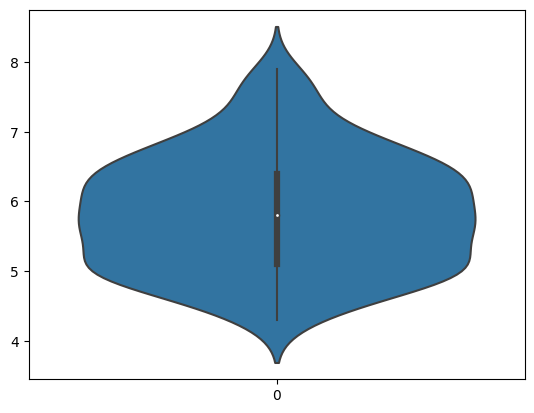

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import load_iris

# iris
df,y = load_iris(return_X_y=True, as_frame=True)

# get the data
'''df = pd.read_csv('/content/Salary_Data.csv')
print(df.head(10))
print("\nDescription:\n",df.describe())'''

data_info = load_iris()
features = data_info["feature_names"]

print(features)

# violin plot
sns.violinplot(df["sepal length (cm)"])
plt.show()



### Isolation Forest Algorithm:

Return the anomaly score of each sample using the IsolationForest algorithm
The IsolationForest 'isolates' observations by randomly selecting a feature
and then randomly selecting a split value between the maximum and minimum
values of the selected feature.

Isolation Forest isolates anomalies in the data points instead of profiling normal data points. As anomalies data points mostly have a lot shorter tree paths than the normal data points, trees in the isolation forest does not need to have a large depth so a smaller max_depth can be used resulting in low memory requirement.


Parameters:
- contamination :
The amount of contamination of the data set, i.e. the proportion
of outliers in the data set. Used when fitting to define the threshold
on the scores of the samples.

In [62]:
# create a model and fit it to the data
model = IsolationForest(n_estimators=50, max_samples='auto', contamination=float(0.1),max_features=1, verbose = 1)
model.fit(df[['sepal length (cm)']])

# add other columns scores and anomaly
df["scores"] = model.decision_function(df[["sepal length (cm)"]])
df["anomaly"] = model.predict(df[["sepal length (cm)"]])
print(df.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

     scores  anomaly  
0  0.120361        1  
1  0.064071        1  
2 -0.015956       -1  
3  0.019855        1  
4  0.114674        1  


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
c:\Users\kruth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


### Get Outliers

In [60]:
# get the data points where anomaly = -1:
anomalies = df.loc[df["anomaly"]==-1]
print("Anomalies: \n", anomalies)
outliers_count = len(anomalies)
print("\nOutlier Count: ", outliers_count)

Anomalies: 
      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
8                  4.4               2.9                1.4               0.2   
13                 4.3               3.0                1.1               0.1   
38                 4.4               3.0                1.3               0.2   
41                 4.5               2.3                1.3               0.3   
42                 4.4               3.2                1.3               0.2   
48                 5.3               3.7                1.5               0.2   
50                 7.0               3.2                4.7               1.4   
102                7.1               3.0                5.9               2.1   
105                7.6               3.0                6.6               2.1   
107                7.3               2.9                6.3               1.8   
130                7.4               2.8                6.1               1.9   
131            